# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with estimating probabilities and using Bayes Theorem within a Jupyter notebook.  The questions coloured green are important practice for CA.

Before attempting these examples, please ensure you have read through [Chapter 4 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter4/Chapter4.ipynb) and have completed the Learning Central **Chapter 4 quiz**. 

These are good practice for CA 1 Question 5.

***

# Errors

## Question 

Three students measure the same resistance several times, with final measurements (in Ohms):

Student 1: $R = 11 \pm 1$
Student 2: $R = 12 \pm 1$
Student 3: $R = 10 \pm 3$.

Given these three results what do we write down as the best estimate for the resistance $R$? Tip: you will need to use weighted errors.

### Answer

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
R = [11,12,10]
Re = [1,1,3]

def weighted(data, error):
    weights = np.zeros(len(data))
    for i in range(len(weights)):
        weights[i] = 1/error[i]**2

    w_avg = np.sum(weights*data)/np.sum(weights)
    w_err = 1/np.sqrt(np.sum(weights))
    return w_avg, w_err

weighted_avg, weighted_err = weighted(R, Re)

print("Resistance = {:.2f} +/- {:.2f}".format(weighted_avg, weighted_err))

Resistance = 11.42 +/- 0.69


***

# Correlation

## <font color=#30a64d>Question </font>

The datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/worldpopulation.txt) contains the world population size measured since 1960. Plot the data (you will need to upload the datafile to your Google Colab). <br><br>

Measure the correlation coefficient using the in built Python package for the Pearson $r$s statistic. <br><br>

Measure it again but this time creating the functions to calculate $r$ from scratch.  

The url of the file is "https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/worldpopulation.txt"

### Answer

Using scipy pearsonr function, r = 0.99956
Using own r coefficient function, r = 0.99956


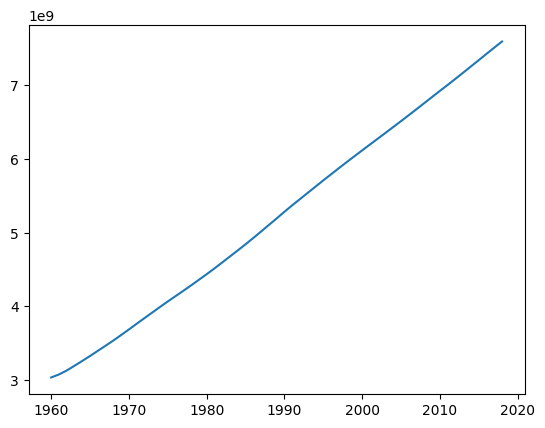

In [22]:
from scipy.stats import pearsonr

pop_data = np.loadtxt("worldpopulation.txt")

corr, _ = pearsonr(pop_data[0,:], pop_data[1,:])

def r_coeff(data1, data2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    numerator = np.sum((data1 - mean1)*(data2 - mean2))
    denom_pt1 = np.sum((data1 - mean1)**2)
    denom_pt2 = np.sum((data2 - mean2)**2)
    r = numerator/np.sqrt(denom_pt1 * denom_pt2)
    return r

r_data = r_coeff(pop_data[0,:], pop_data[1,:])

print("Using scipy pearsonr function, r = {:.5f}".format(corr))
print("Using own r coefficient function, r = {:.5f}".format(r_data))


plt.plot(pop_data[0,:], pop_data[1,:])

***

# Hypothesis Testing

## <font color=#30a64d>Question</font>

A company releases a new ski wax that it claims (naturally) is superior to its rivals, and greatly reduces the friction between skis and snow. A skiing magazine decides to test the claim by performing an experiment. They take 10 pairs of skis, and treat one ski from each pair -- the left one -- with the new wax, and the other (the right) ski with the wax from a competing brand. Each pair of skis are then released from the top of a ramp in turn, and they record which of the two skis reach the bottom of the ramp first.    The team find that the new skis win 8 of the 10 races.  Is their claim correct?

### Answer

In [1]:
import math

def Binom_Prob(N_successes, N_trials, Prob_success):
    binom_coeff = math.factorial(N_trials)/(math.factorial(N_successes)*math.factorial(abs(N_trials - N_successes)))
    return binom_coeff*(Prob_success**N_successes) * (1 - Prob_success)**(N_trials-N_successes)

# null hypothesis: equal probability of either the new or old waxed skis winning the race
# therefore p(new) = p(old) = 0.5

p = 0.5
#successes
nu = 8
#trials
N=10

print("probability of the new waxed skis winning 8/10 races if null hypothesis true = {:.6f}.".format(Binom_Prob(nu,N,p)))

# we need the prob they won 8, 9 or 10 races
prob_sum = 0
nu_list = [8,9,10]
for i in range(len(nu_list)):
    prob_sum += Binom_Prob(nu_list[i], N, p)
print("probability of the new waxed skis winning 8 or more races if null hypothesis true = {:.6f}.".format(prob_sum))

print("probability given null hypothesis is more than 5% therefore cannot reject the null hypothesis with a significance value of 0.05")

probability of the new waxed skis winning 8/10 races if null hypothesis true = 0.043945.
probability of the new waxed skis winning 8 or more races if null hypothesis true = 0.054688.
probability given null hypothesis is more than 5% therefore cannot reject the null hypothesis with a significance value of 0.05


***